In [ ]:
import json
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from statsmodels.tsa.seasonal import seasonal_decompose
import collections
import itertools
import time
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/time_dataset.csv'
time_dataset = pd.read_csv(file_path)

## **Exploratory Data Analysis**

Histogram of the number of reviews per category. Check outliers per category.

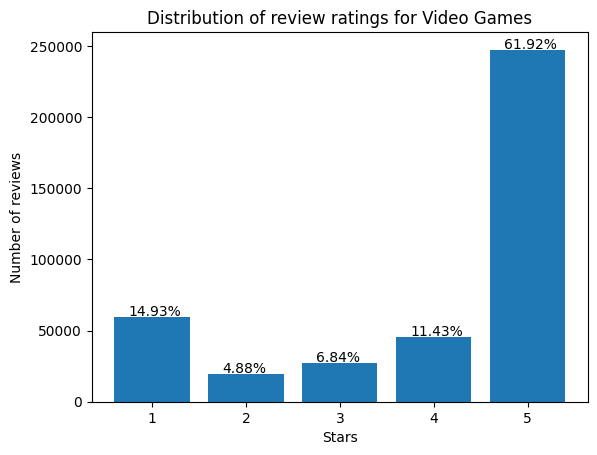

In [ ]:
stars = []
# Filter dataframe to get only rows where main_cat is 'Video Games'
videogames_df = time_dataset[time_dataset['main_cat'] == 'Video Games']
# Extract the 'overall' ratings for these rows
stars = videogames_df['overall'].tolist()

counts = Counter(stars)

total_count = sum(counts.values())
percentages = []
for i in range(len(counts)):
  percentages.append(100*counts[i+1]/total_count)

plt.bar(list(counts.keys()), list(counts.values()))
for i, v in enumerate(percentages):
    plt.text(i+1-.25, counts[i+1] + 500, str(round(v,2))+'%')

plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.title('Distribution of review ratings for Video Games')
plt.show()

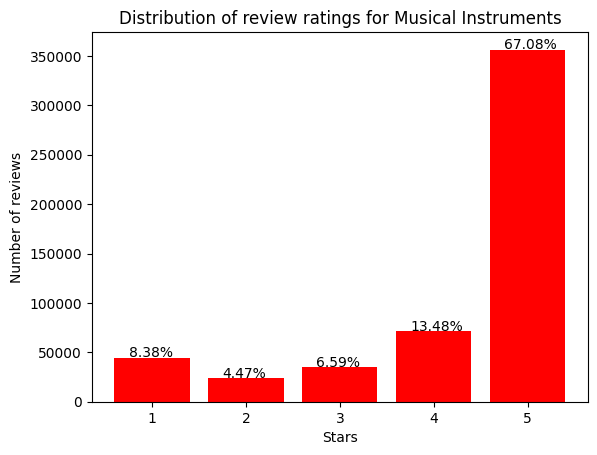

In [ ]:
stars = []
# Filter dataframe to get only rows where main_cat is 'Musical Instruments'
musical_instruments_df = time_dataset[time_dataset['main_cat'] == 'Musical Instruments']
# Extract the 'overall' ratings for these rows
stars = musical_instruments_df['overall'].tolist()

counts = Counter(stars)

total_count = sum(counts.values())
percentages = []
for i in range(len(counts)):
  percentages.append(100*counts[i+1]/total_count)

plt.bar(list(counts.keys()), list(counts.values()),color = "red")
for i, v in enumerate(percentages):
    plt.text(i+1-.25, counts[i+1] + 500, str(round(v,2))+'%')

plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.title('Distribution of review ratings for Musical Instruments')
plt.show()

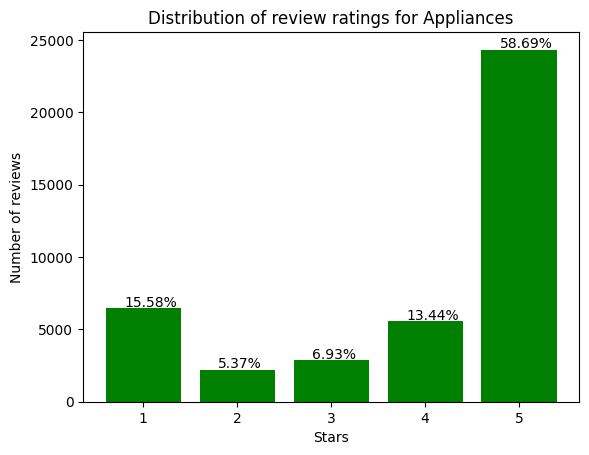

In [ ]:
stars = []
# Filter dataframe to get only rows where main_cat is 'Musical Instruments'
appliances_df = time_dataset[time_dataset['main_cat'] == 'Appliances']
# Extract the 'overall' ratings for these rows
stars = appliances_df['overall'].tolist()

counts = Counter(stars)

total_count = sum(counts.values())
percentages = []
for i in range(len(counts)):
  percentages.append(100*counts[i+1]/total_count)

plt.bar(list(counts.keys()), list(counts.values()),color = "green")
for i, v in enumerate(percentages):
    plt.text(i+1-0.2, counts[i+1] + 100, str(round(v,2))+'%')

plt.xlabel('Stars')
plt.ylabel('Number of reviews')
plt.title('Distribution of review ratings for Appliances')
plt.show()

In [ ]:
pip install pymannkendall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


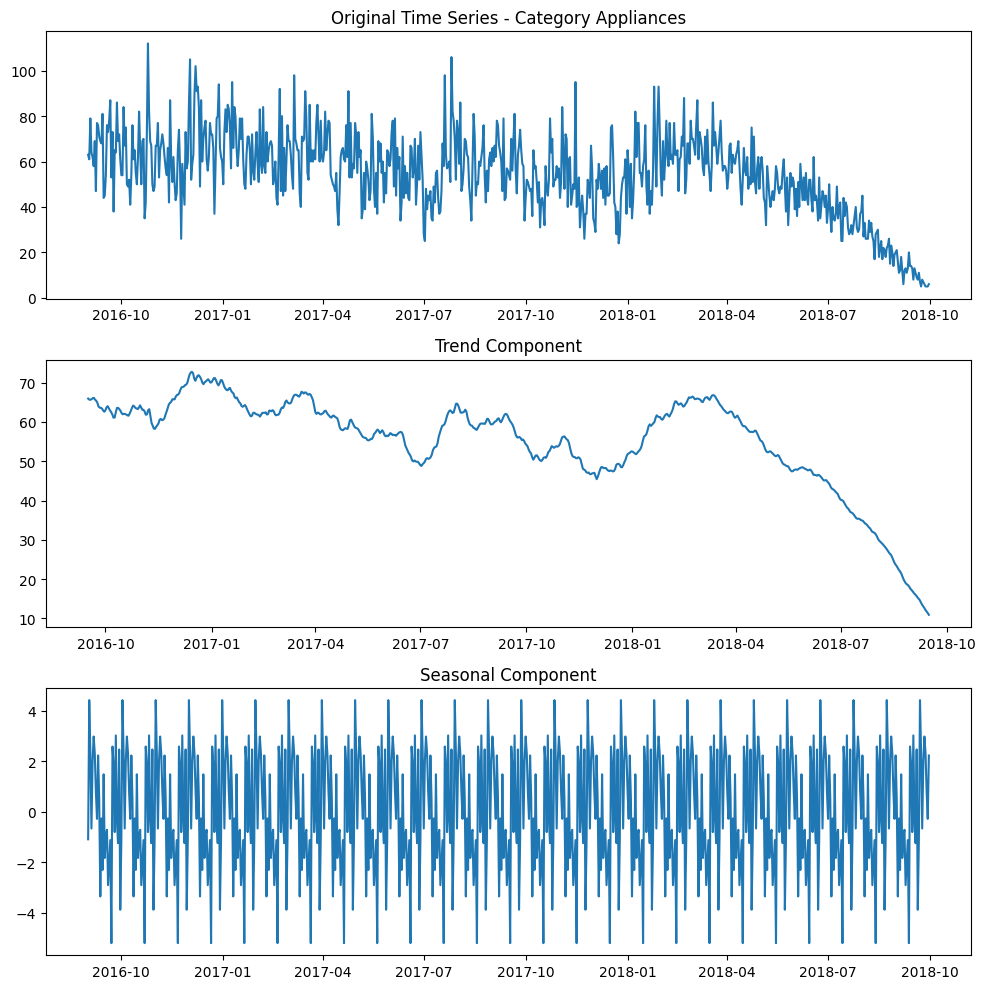

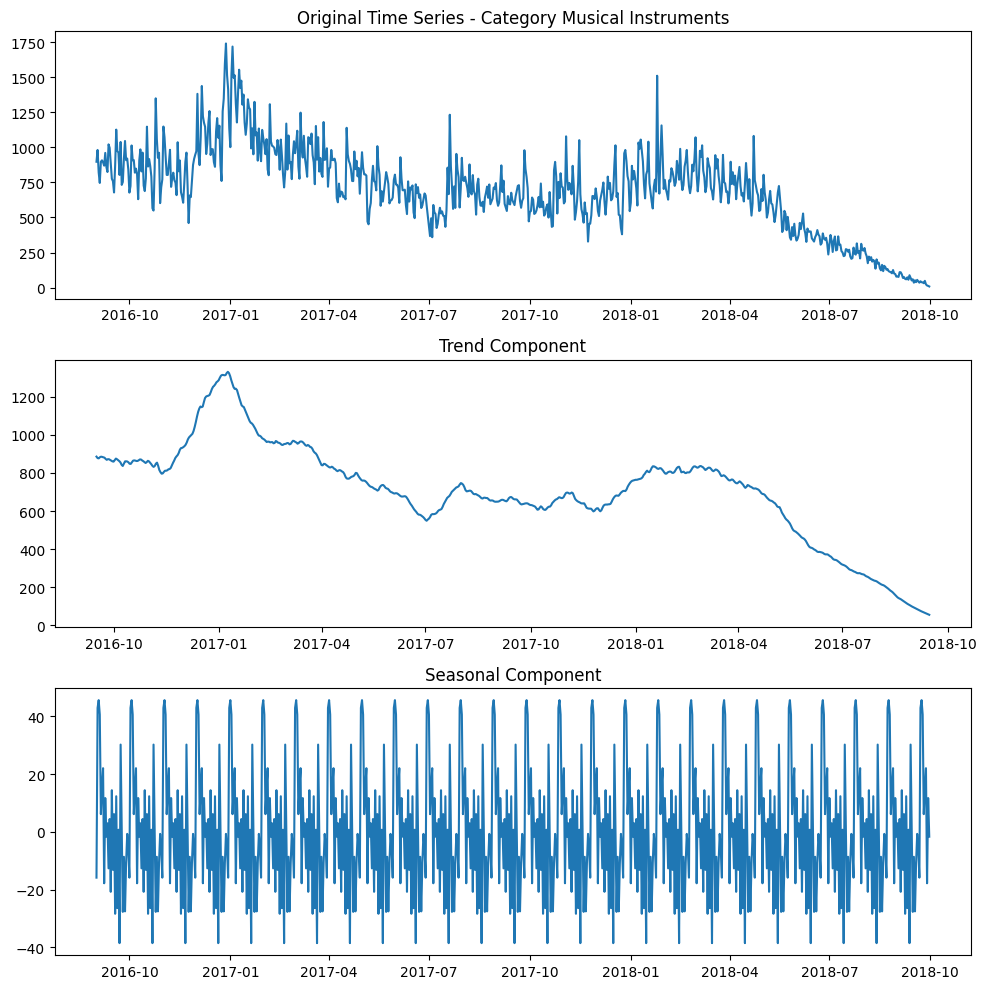

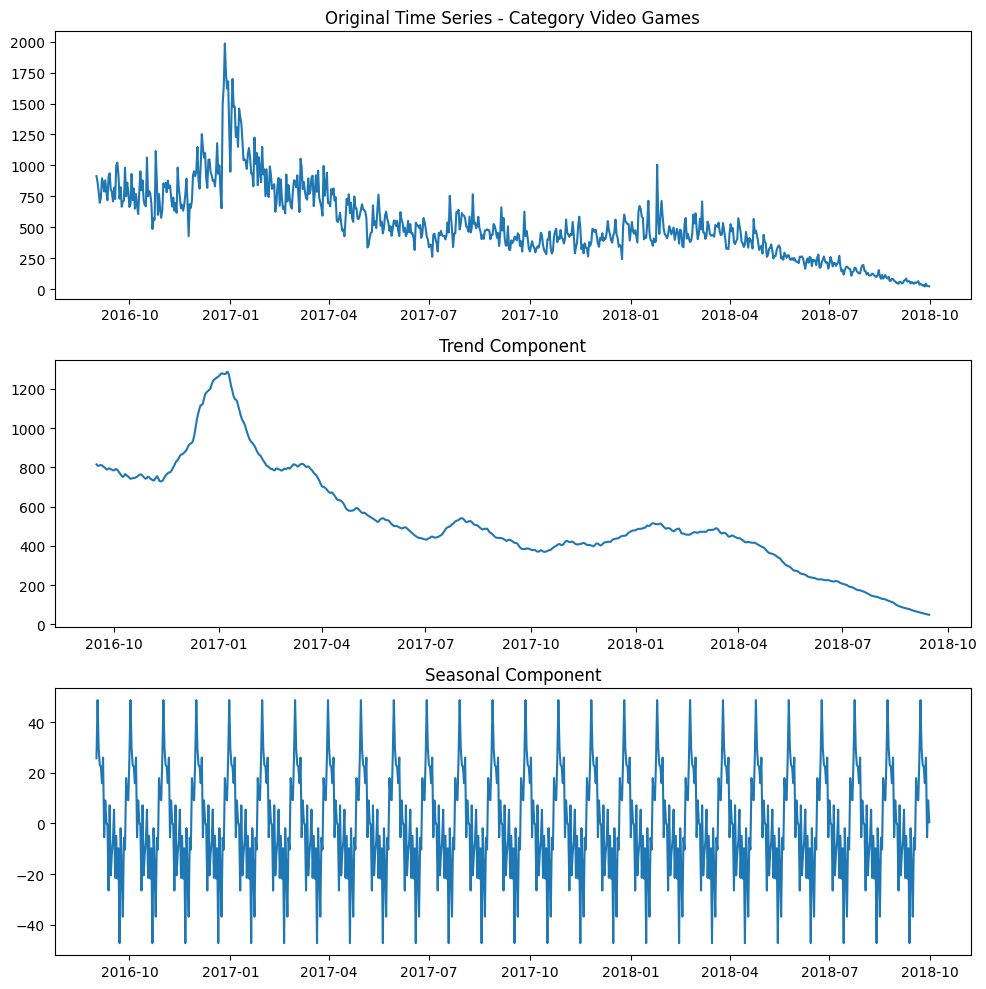

In [ ]:
####Check the trend of the number of reviews per category###

# Calculate the number of reviews per day for each category
reviews_per_day = time_dataset.groupby(['main_cat', 'reviewTime']).size().reset_index(name='counts')

# Perform decomposition and plot for each category
for main_cat in reviews_per_day['main_cat'].unique():
    category_data = reviews_per_day[reviews_per_day['main_cat'] == main_cat]

    # Convert the 'reviewTime' to datetime format and set it as index, this is required for decomposition
    category_data.set_index(pd.to_datetime(category_data['reviewTime']), inplace=True)

    # Perform decomposition
    decomposition = seasonal_decompose(category_data['counts'], model='additive', period=30)  # Adjust the period as needed

    # Plot decomposition components
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))

    # Original time series
    axes[0].plot(category_data.index, category_data['counts'])
    axes[0].set_title(f'Original Time Series - Category {main_cat}')

    # Trend component
    axes[1].plot(category_data.index, decomposition.trend)
    axes[1].set_title('Trend Component')

    # Seasonal component
    axes[2].plot(category_data.index, decomposition.seasonal)
    axes[2].set_title('Seasonal Component')

    plt.tight_layout()
    plt.show()

In [ ]:
from pymannkendall import seasonal_test

# List of unique categories
categories = reviews_per_day['main_cat'].unique()

for main_cat in categories:
    # Filter data for the current category
    category_data = reviews_per_day[reviews_per_day['main_cat'] == main_cat]

    # Perform Mann-Kendall test and Sen's slope
    result = seasonal_test(category_data['counts'], period=12)  # Adjust the period as needed

    print(f"Category: {main_cat}")
    print(f"Sen's slope: {result.slope}")
    print(f"P-value for Mann-Kendall test: {result.p}")
    print("\n")

Category: Appliances
Sen's slope: -0.5309311224489797
P-value for Mann-Kendall test: 0.0


Category: Musical Instruments
Sen's slope: -11.649561403508773
P-value for Mann-Kendall test: 0.0


Category: Video Games
Sen's slope: -12.281650641025642
P-value for Mann-Kendall test: 0.0




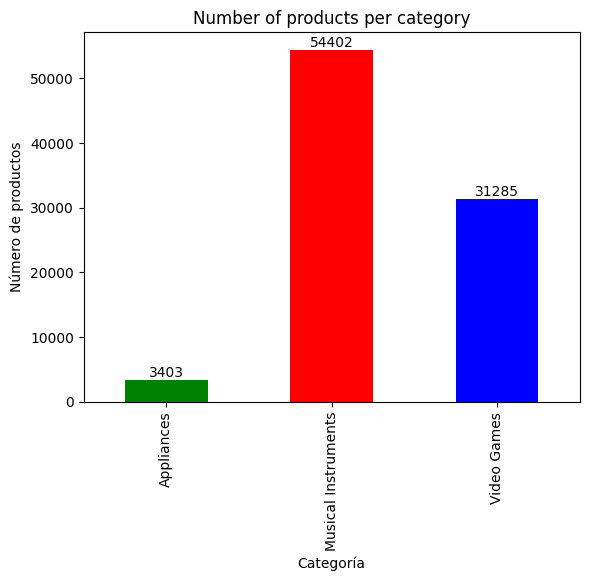

In [ ]:
# Define the colors for each category
colors = {'Appliances': 'green', 'Musical Instruments': 'red', 'Video Games': 'blue'}

# Group the data and calculate the number of unique products per category
product_count_per_category_all = time_dataset.groupby('main_cat')['asin'].nunique()

# Plot the bar chart
ax = product_count_per_category_all.plot(kind='bar', color=[colors.get(c, 'gray') for c in product_count_per_category_all.index])

# Add labels and title
plt.xlabel('Categoría')
plt.ylabel('Número de productos')
plt.title('Number of products per category')

# Add the total number of products on top of each bar
for i, v in enumerate(product_count_per_category_all):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


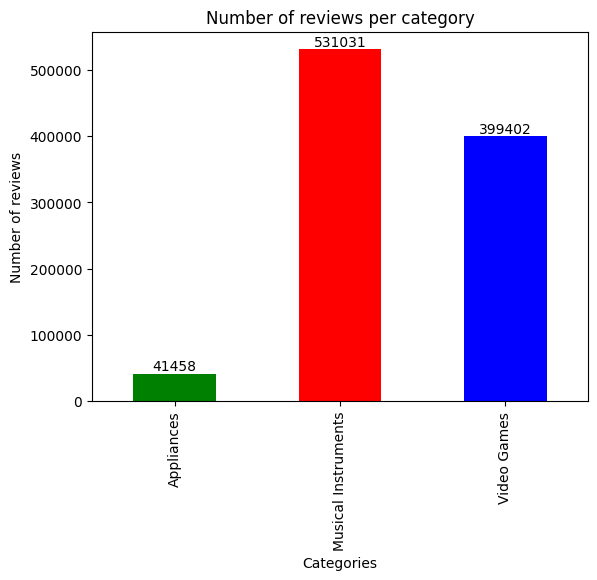

In [ ]:
# Define the colors for each category
colors = {'Appliances': 'green', 'Musical Instruments': 'red', 'Video Games': 'blue'}

# Group the data and calculate the total number of reviews per category
reviews_per_category = time_dataset.groupby('main_cat').size()

# Plot the bar chart
ax = reviews_per_category.plot(kind='bar', color=[colors.get(c, 'gray') for c in reviews_per_category.index])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of reviews')
plt.title('Number of reviews per category')

# Add the total number of reviews on top of each bar
for i, v in enumerate(reviews_per_category):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

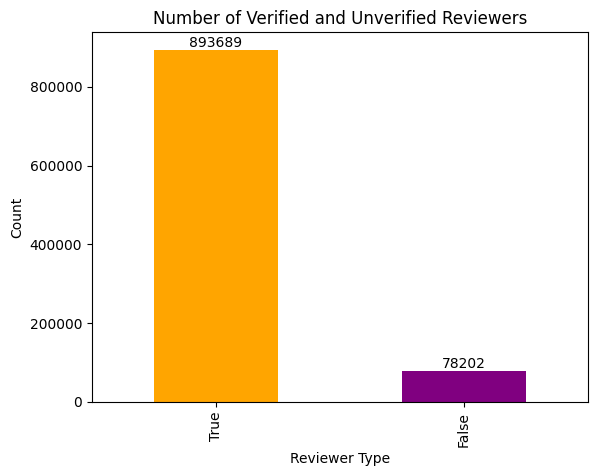

In [ ]:
# Define the colors for each category
colors = {'True': 'orange', 'False': 'purple'}

# Count the number of verified and unverified reviewers
reviewer_counts = time_dataset["verified"].value_counts()

# Plot the bar chart
ax = reviewer_counts.plot(kind='bar', color=[colors.get(str(c), 'gray') for c in reviewer_counts.index])

# Add labels and title
plt.xlabel('Reviewer Type')
plt.ylabel('Count')
plt.title('Number of Verified and Unverified Reviewers')

# Add the count on top of each bar
for i, v in enumerate(reviewer_counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# Average rating per category
average_stars_all = time_dataset.groupby('main_cat')['overall'].mean()
average_stars_all

main_cat
Appliances             3.942785
Musical Instruments    4.264167
Video Games            4.005325
Name: overall, dtype: float64

In [ ]:
# Group the DataFrame by 'main_cat' and 'asin', and calculate the number of reviews per product
reviews_per_product_all = time_dataset.groupby(['main_cat', 'asin'])['reviewerID'].count().reset_index()

# Calculate the average number of reviews per category
average_reviews_per_category_all = reviews_per_product_all.groupby('main_cat')['reviewerID'].mean()

# Print the average number of reviews per category
for category, avg_reviews in average_reviews_per_category_all.items():
    print(f"Average number of reviews per category '{category}': {avg_reviews:.2f}")

Average number of reviews per category 'Appliances': 12.18
Average number of reviews per category 'Musical Instruments': 9.76
Average number of reviews per category 'Video Games': 12.77


In [ ]:
# Average number of reviews per verified and unverified user
verified_reviews_count = time_dataset[time_dataset['verified'] == True].groupby('reviewerID').count()
unverified_reviews_count = time_dataset[time_dataset['verified'] == False].groupby('reviewerID').count()

avg_verified_reviews = verified_reviews_count['asin'].mean()
avg_unverified_reviews = unverified_reviews_count['asin'].mean()

print(f"Average number of reviews per verified user: {avg_verified_reviews}")
print(f"Average number of reviews per unverified user: {avg_unverified_reviews}")

Average number of reviews per verified user: 1.5396697689002519
Average number of reviews per unverified user: 1.2889306434599157


<Figure size 1000x600 with 0 Axes>

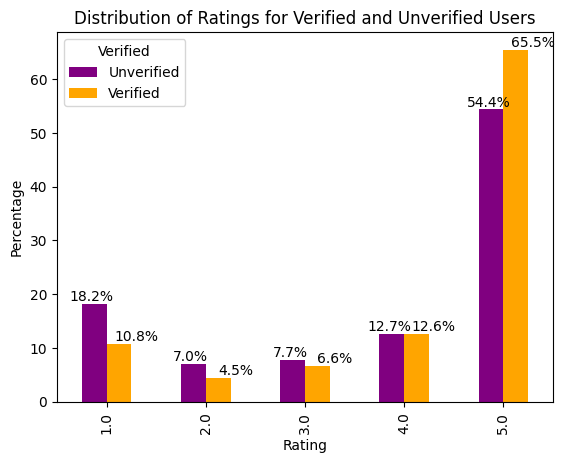

In [ ]:
# Group by 'verified' and 'overall', then get counts, then unstack levels to have a df that seaborn can easily plot.
counts = time_dataset.groupby(['verified','overall']).size().unstack(level=0)

# Convert counts into percentages
counts_pct = counts.divide(counts.sum()).multiply(100)

# Create the barplots
plt.figure(figsize=(10,6))
bar_plot = counts_pct.plot(kind='bar', stacked=False, color=['purple', 'orange'])

plt.title('Distribution of Ratings for Verified and Unverified Users')
plt.ylabel('Percentage')
plt.xlabel('Rating')
plt.legend(title='Verified', loc='upper left', labels=['Unverified', 'Verified'])

# Add percentages on top of each bar manually with adjusted positions
for i, bar_container in enumerate(bar_plot.containers):
    for bar in bar_container:
        yval = bar.get_height()
        xval = bar.get_x()
        if i == 0:  # for Unverified, more to the left
            position_factor = 0.1
        else:  # for Verified, more to the right
            position_factor = 0.3
        plt.text(xval+position_factor, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Assuming 'verified_ratings' and 'unverified_ratings' are NumPy arrays or Pandas Series containing the ratings for each group

# Perform the Mann-Whitney U test
verified_ratings = time_dataset[time_dataset['verified']]['overall']
unverified_ratings = time_dataset[~time_dataset['verified']]['overall']
statistic, p_value = mannwhitneyu(verified_ratings, unverified_ratings, alternative='two-sided')
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

Mann-Whitney U statistic: 39511338627.5
P-value: 0.0


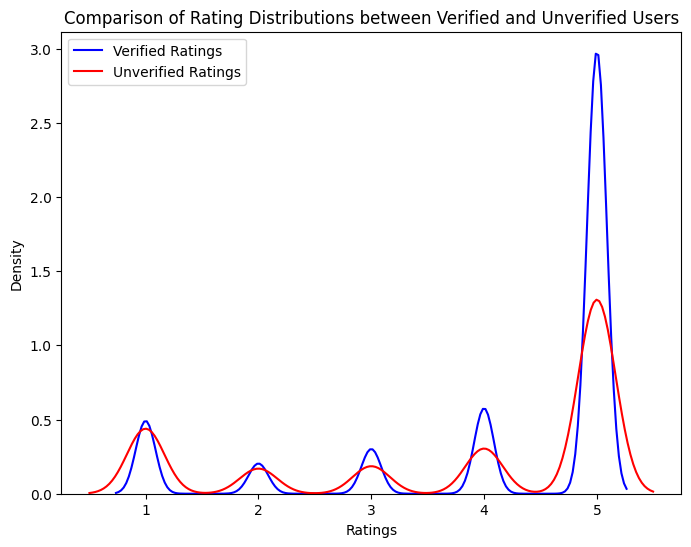

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.kdeplot(verified_ratings, color='blue', label='Verified Ratings')
sns.kdeplot(unverified_ratings, color='red', label='Unverified Ratings')

plt.title('Comparison of Rating Distributions between Verified and Unverified Users')
plt.xlabel('Ratings')
plt.ylabel('Density')

plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

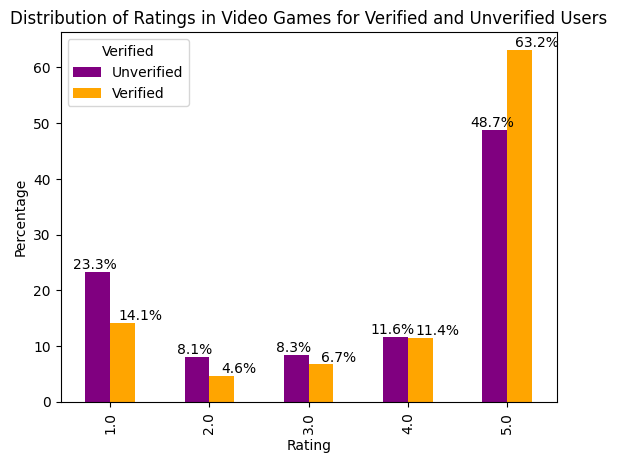

<Figure size 1000x600 with 0 Axes>

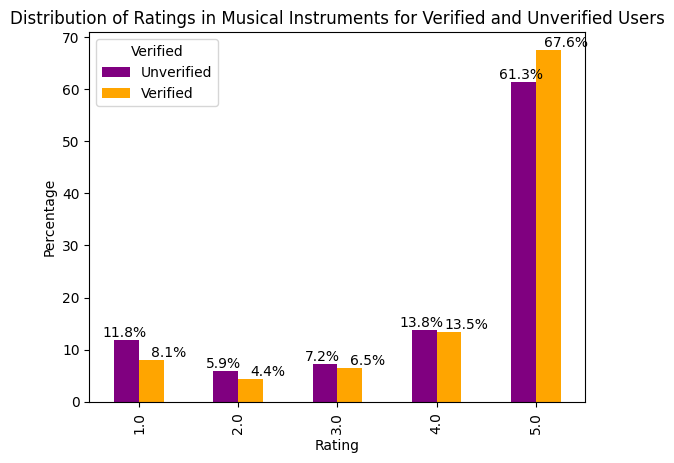

<Figure size 1000x600 with 0 Axes>

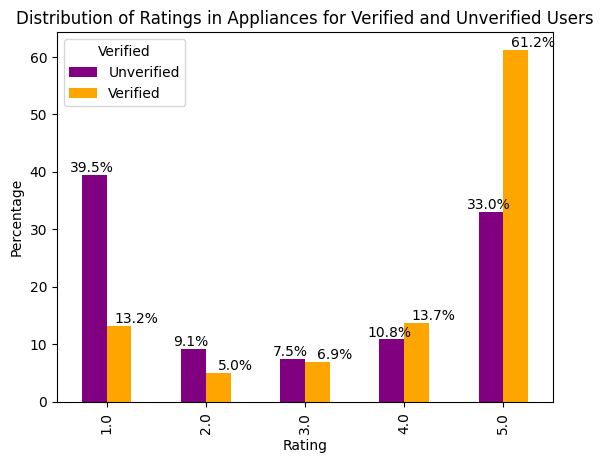

In [ ]:
# Get all unique categories
categories = time_dataset['main_cat'].unique()

# Create a plot for each category
for category in categories:
    # Filter data for the current category
    filtered_data = time_dataset[time_dataset['main_cat'] == category]

    # Group by 'verified' and 'overall', then get counts, then unstack levels to have a df that seaborn can easily plot.
    counts = filtered_data.groupby(['verified','overall']).size().unstack(level=0)

    # Convert counts into percentages
    counts_pct = counts.divide(counts.sum()).multiply(100)

    # Create the barplots
    plt.figure(figsize=(10,6))
    bar_plot = counts_pct.plot(kind='bar', stacked=False, color=['purple', 'orange'])

    plt.title(f'Distribution of Ratings in {category} for Verified and Unverified Users')
    plt.ylabel('Percentage')
    plt.xlabel('Rating')
    plt.legend(title='Verified', loc='upper left', labels=['Unverified', 'Verified'])

    # Add percentages on top of each bar manually with adjusted positions
    for i, bar_container in enumerate(bar_plot.containers):
        for bar in bar_container:
            yval = bar.get_height()
            xval = bar.get_x()
            if i == 0:  # for Unverified, more to the left
                position_factor = 0.1
            else:  # for Verified, more to the right
                position_factor = 0.3
            plt.text(xval+position_factor, yval, f'{yval:.1f}%', ha='center', va='bottom')

    plt.show()


Category: Video Games
Mann-Whitney U statistic: 7371626022.0
P-value: 0.0

Category: Musical Instruments
Mann-Whitney U statistic: 10476370887.5
P-value: 1.3022526060686954e-185

Category: Appliances
Mann-Whitney U statistic: 95904101.0
P-value: 0.0


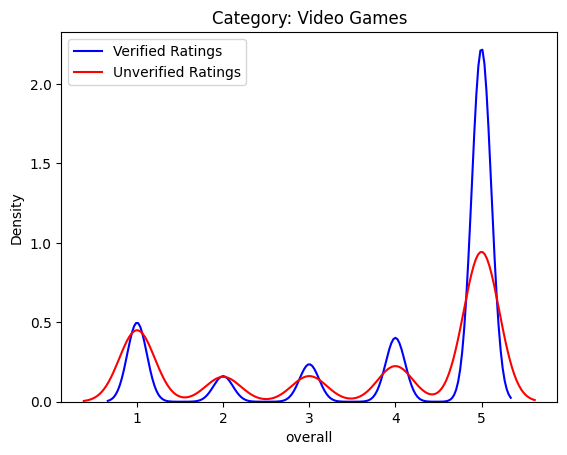

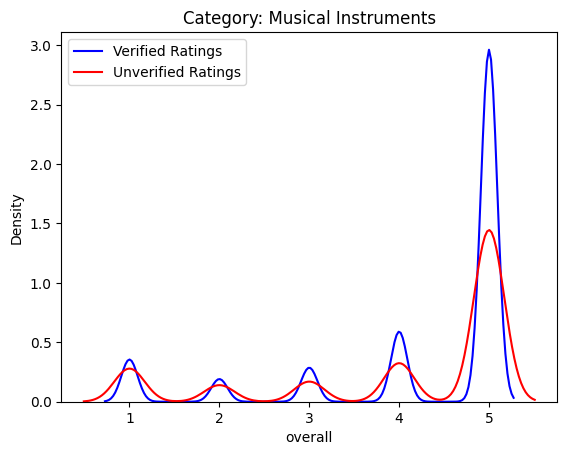

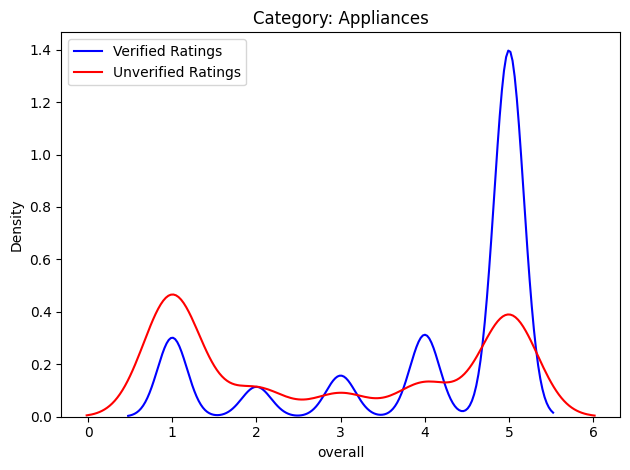

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Get the unique categories
categories = time_dataset['main_cat'].unique()

# Loop through each category
for category in categories:
    # Filter the data for the current category
    cat_data = time_dataset[time_dataset['main_cat'] == category]

    # Split the data into verified and unverified ratings
    verified_ratings = cat_data[cat_data['verified']]['overall']
    unverified_ratings = cat_data[~cat_data['verified']]['overall']

    # Create a figure and axes
    fig, ax = plt.subplots()

    # Plot the density plot for each group
    sns.kdeplot(verified_ratings, ax=ax, color='blue', label='Verified Ratings')
    sns.kdeplot(unverified_ratings, ax=ax, color='red', label='Unverified Ratings')

    # Add a title and legend
    ax.set_title(f"Category: {category}")
    ax.legend()

    # Perform the Mann-Whitney U test and print the results
    statistic, p_value = mannwhitneyu(verified_ratings, unverified_ratings, alternative='two-sided')
    print(f"\nCategory: {category}")
    print(f"Mann-Whitney U statistic: {statistic}")
    print(f"P-value: {p_value}")

# Show the plot
plt.tight_layout()
plt.show()

### **Temporal Analysis of Review Scores:**

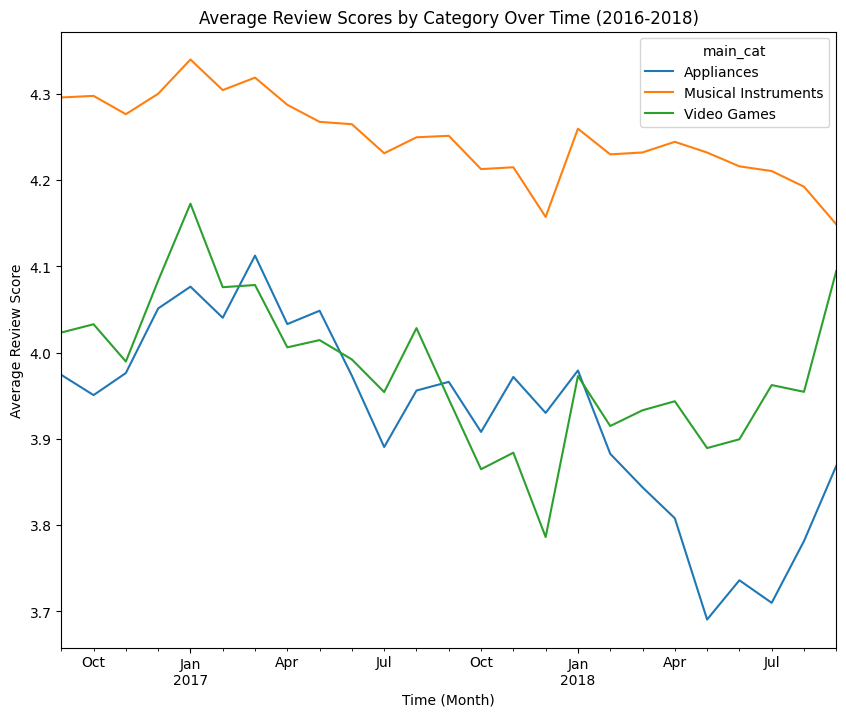

In [ ]:
# Assuming 'df' is your DataFrame
time_dataset['reviewTime'] = pd.to_datetime(time_dataset['reviewTime'])  # Convert reviewTime to datetime
df = time_dataset.sort_values('reviewTime')  # Sort DataFrame by reviewTime

# Filter the DataFrame for the years 2016-2018
df = df[df['reviewTime'].dt.year.isin([2016, 2017, 2018])]

# Group by 'reviewTime' (to the month) and 'main_cat', then calculate the mean of 'overall' (review scores)
average_scores = df.groupby([df['reviewTime'].dt.to_period('M'), 'main_cat'])['overall'].mean().unstack()

# Plotting
ax = average_scores.plot(kind='line', figsize=(10, 8))

# Set labels and title
ax.set_xlabel('Time (Month)')
ax.set_ylabel('Average Review Score')
ax.set_title('Average Review Scores by Category Over Time (2016-2018)')

# Display the plot
plt.show()

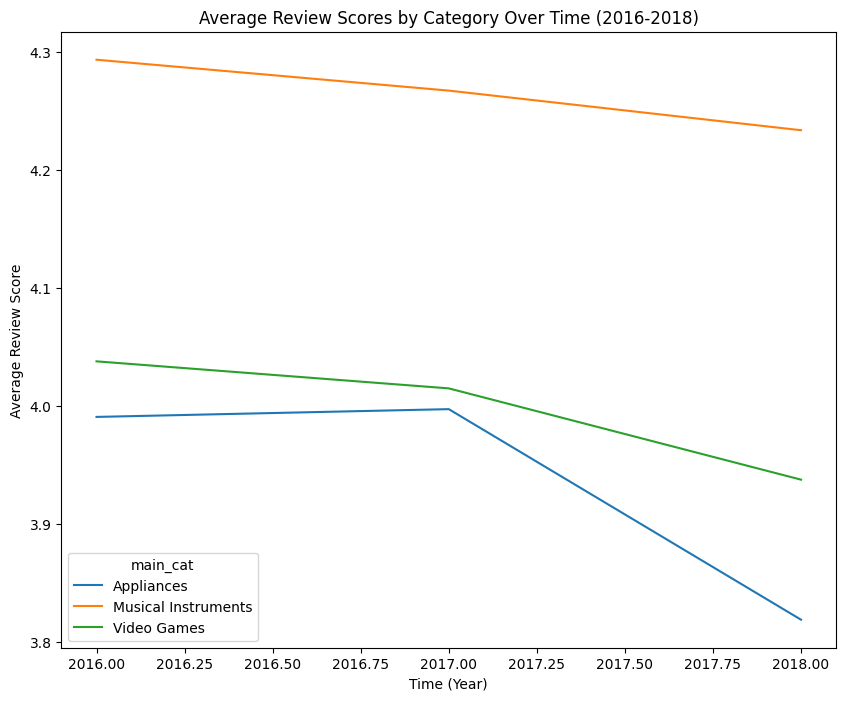

In [ ]:

# Group by 'reviewTime' and 'main_cat', then calculate the mean of 'overall' (review scores)
average_scores = df.groupby([df['reviewTime'].dt.year, 'main_cat'])['overall'].mean().unstack()

# Plotting
ax = average_scores.plot(kind='line', figsize=(10, 8))

# Set labels and title
ax.set_xlabel('Time (Year)')
ax.set_ylabel('Average Review Score')
ax.set_title('Average Review Scores by Category Over Time (2016-2018)')

# Display the plot
plt.show()

In [ ]:
from scipy.stats import spearmanr

# Aggregate data by product
df_agg = time_dataset.groupby('asin').agg({'overall': np.mean, 'reviewerID': 'count'}).reset_index()

# Rename columns for better understanding
df_agg.columns = ['asin', 'avg_rating', 'review_count']

# Calculate Spearman's Correlation Coefficient
corr, _ = spearmanr(df_agg['avg_rating'], df_agg['review_count'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.212


In [ ]:
# Unique categories
categories = time_dataset['main_cat'].unique()

for cat in categories:
    # Filter data for the current category
    df_cat = time_dataset[time_dataset['main_cat'] == cat]

    # Aggregate data by product
    df_agg = df_cat.groupby('asin').agg({'overall': np.mean, 'reviewerID': 'count'}).reset_index()

    # Rename columns for better understanding
    df_agg.columns = ['asin', 'avg_rating', 'review_count']

    # Calculate Pearson Correlation Coefficient
    corr, _ = spearmanr(df_agg['avg_rating'], df_agg['review_count'])
    print(f"Spearmans correlation for category {cat}: {corr:.3f}")

Spearmans correlation for category Video Games: -0.148
Spearmans correlation for category Musical Instruments: -0.239
Spearmans correlation for category Appliances: -0.090
